# Network Intrusion Detection

In [1]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
import os
import json
import csv
import pandas as pd
import sklearn.feature_extraction.text as tfidf
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import zscore
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import f1_score
import collections
from keras import optimizers
from keras.layers import Conv1D, Conv2D, MaxPooling2D

import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report




/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Data Preprocessing 

# Step 1: Read network intrusion data csv file 

In [3]:
df = pd.read_csv("network_intrusion_data.csv") 

In [4]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Step 2 Adding Column Headers

In [5]:
df.columns = [    'duration',    'protocol_type',    'service',     'flag',    'src_bytes',    'dst_bytes',    'land',    'wrong_fragment',
    'urgent',    'hot',    'num_failed_logins',    'logged_in',    'num_compromised',    'root_shell',    'su_attempted',    'num_root',    'num_file_creations',    'num_shells',    'num_access_files',    'num_outbound_cmds',     'is_host_login',    'is_guest_login',    'count',    'srv_count',    'serror_rate',    'srv_serror_rate',    'rerror_rate',    'srv_rerror_rate',    'same_srv_rate',    'diff_srv_rate',    'srv_diff_host_rate',    'dst_host_count',    'dst_host_srv_count',    'dst_host_same_srv_rate',    'dst_host_diff_srv_rate',    'dst_host_same_src_port_rate',    'dst_host_srv_diff_host_rate',    'dst_host_serror_rate',    'dst_host_srv_serror_rate',    'dst_host_rerror_rate',    'dst_host_srv_rerror_rate',    'outcome' ] 

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Step 3 Encoding good connections as “0” and bad connections as “1”

In [7]:
df['outcome'][:1]

0    normal.
Name: outcome, dtype: object

In [8]:
def classify_connections(outcome):
    if(outcome =="normal."):
        outcome = 0  
    else: 
        outcome = 1
    
    return outcome

In [9]:
df["outcome"] = df["outcome"].apply(classify_connections)

In [10]:
df.count()[0]

494020

# Step 4 Drop duplicates

In [11]:
df = df.drop_duplicates()
df.count()[0]

145584

# Step 5 Drop the rows where at least one element is missing

In [12]:
df = df.dropna()

In [13]:
df.count()[0]     # shows that there is no row with atleast one element missing

145584

# Data Preprocessing Completed

In [14]:
df.values[:5]

array([[0, 'tcp', 'http', 'SF', 239, 486, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 8, 8, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 19,
        19, 1.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 235, 1337, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 8, 8, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 29,
        29, 1.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 219, 1337, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 6, 6, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 39,
        39, 1.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 217, 2032, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 6, 6, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 49,
        49, 1.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 217, 2032, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 6, 6, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 59,
        59, 1.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [15]:
df["wrong_fragment"].values[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# df.columns = [    'duration',    'protocol_type',    'service',     'flag',    'src_bytes',    'dst_bytes',    'land',    'wrong_fragment', 'urgent',    'hot',    'num_failed_logins',    'logged_in',    'num_compromised',    'root_shell',    'su_attempted',    'num_root',    'num_file_creations',    'num_shells',    'num_access_files',    'num_outbound_cmds',     'is_host_login',    'is_guest_login',    'count',    'srv_count',    'serror_rate',    'srv_serror_rate',    'rerror_rate',    'srv_rerror_rate',    'same_srv_rate',    'diff_srv_rate',    'srv_diff_host_rate',    'dst_host_count',    'dst_host_srv_count',    'dst_host_same_srv_rate',    'dst_host_diff_srv_rate',    'dst_host_same_src_port_rate',    'dst_host_srv_diff_host_rate',    'dst_host_serror_rate',    'dst_host_srv_serror_rate',    'dst_host_rerror_rate',    'dst_host_srv_rerror_rate',    'outcome' ]

In [16]:
df.groupby('protocol_type').count()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
protocol_type,,,,,,,,,,,,,,,,,,,,,
icmp,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405,...,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405
tcp,130912,130912,130912,130912,130912,130912,130912,130912,130912,130912,...,130912,130912,130912,130912,130912,130912,130912,130912,130912,130912
udp,12267,12267,12267,12267,12267,12267,12267,12267,12267,12267,...,12267,12267,12267,12267,12267,12267,12267,12267,12267,12267


In [17]:
def Z_score(column):
    df[column] = zscore(df[column])

In [18]:
mylist = ['duration','src_bytes','dst_bytes','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files','count','srv_count', 'dst_host_count', 'dst_host_srv_count']
for i in mylist:
    Z_score(i)

In [19]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.107851,tcp,http,SF,-0.004261,-0.039036,0,0,0,-0.07021,...,-0.967067,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
1,-0.107851,tcp,http,SF,-0.004263,-0.025042,0,0,0,-0.07021,...,-0.879894,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
2,-0.107851,tcp,http,SF,-0.004272,-0.025042,0,0,0,-0.07021,...,-0.792721,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,-0.107851,tcp,http,SF,-0.004273,-0.013613,0,0,0,-0.07021,...,-0.705548,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0
4,-0.107851,tcp,http,SF,-0.004273,-0.013613,0,0,0,-0.07021,...,-0.618375,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [20]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [21]:
mylist = ["protocol_type","service","flag","logged_in","root_shell","is_guest_login"]
for i in mylist:
    print(i)
    encode_text_dummy(df,i)

protocol_type
service
flag
logged_in
root_shell
is_guest_login


In [22]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,logged_in-0,logged_in-1,root_shell-0,root_shell-1,is_guest_login-0,is_guest_login-1
0,-0.107851,-0.004261,-0.039036,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
1,-0.107851,-0.004263,-0.025042,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
2,-0.107851,-0.004272,-0.025042,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
3,-0.107851,-0.004273,-0.013613,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
4,-0.107851,-0.004273,-0.013613,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
5,-0.107851,-0.004276,-0.015126,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
6,-0.107851,-0.004305,0.020181,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
7,-0.107851,-0.004277,-0.044545,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
8,-0.107851,-0.004276,-0.034103,0,0,0,0.630658,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
9,-0.107851,-0.004277,-0.036767,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0


In [23]:
df.drop(['num_outbound_cmds', 'is_host_login'], axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,logged_in-0,logged_in-1,root_shell-0,root_shell-1,is_guest_login-0,is_guest_login-1
0,-0.107851,-0.004261,-0.039036,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
1,-0.107851,-0.004263,-0.025042,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
2,-0.107851,-0.004272,-0.025042,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
3,-0.107851,-0.004273,-0.013613,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
4,-0.107851,-0.004273,-0.013613,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
5,-0.107851,-0.004276,-0.015126,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
6,-0.107851,-0.004305,0.020181,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
7,-0.107851,-0.004277,-0.044545,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
8,-0.107851,-0.004276,-0.034103,0,0,0,0.630658,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
9,-0.107851,-0.004277,-0.036767,0,0,0,-0.070210,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0


# LOGISTIC REGRESSION

In [24]:
output_df = df["outcome"]
output_array = output_df.values

print(output_array[:2])

[0 0]


In [25]:
df = df.drop(["outcome"], axis=1)

In [26]:
input_df = df
input_array = input_df.values

In [27]:
x_train,x_test,y_train,y_test = train_test_split(input_array,output_array, test_size=0.2,random_state=42)

In [28]:
print(x_train.shape)

(116467, 121)


In [29]:
logreg = linear_model.LogisticRegression()

In [30]:
print(type(y_train))
print(y_train)

<class 'numpy.ndarray'>
[0 1 0 ... 1 1 0]


In [31]:
print(utils.multiclass.type_of_target(y_train))

binary


In [32]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred_logistic = logreg.predict(x_test)

In [34]:
# Explained f1 score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_logistic,average='micro'))

Evaluating with F1 score metric: 0.99


In [35]:
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9927190301198613


In [36]:
score = metrics.precision_score(y_test,y_pred_logistic, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9927181169110824


In [37]:
score = metrics.recall_score(y_test,y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9927190301198613


In [38]:
names = (np.unique(output_array))

# Confusion Matrix

[[17610    88]
 [  124 11295]]
Plotting confusion matrix


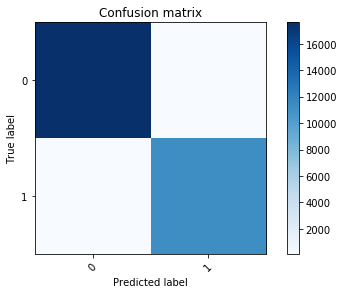

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     17698
          1       0.99      0.99      0.99     11419

avg / total       0.99      0.99      0.99     29117



In [39]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_logistic))

# ROC Curve

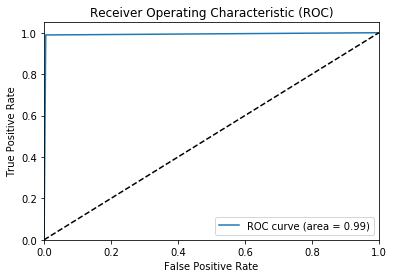

In [40]:
plot_roc(y_pred_logistic,y_test)

# Nearest Neighbor

In [41]:
neigh = KNeighborsClassifier(n_neighbors=23)

In [42]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [43]:
y_pred_neigh = neigh.predict(x_test)

In [44]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_neigh))

Evaluating with F1 score metric: 1.00


In [45]:
score = metrics.accuracy_score(y_test, y_pred_neigh)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9973898409863654


In [46]:
score = metrics.precision_score(y_test,y_pred_neigh, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.997390635892706


In [47]:
score = metrics.recall_score(y_test,y_pred_neigh, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9973898409863654


[[17674    24]
 [   52 11367]]
Plotting confusion matrix


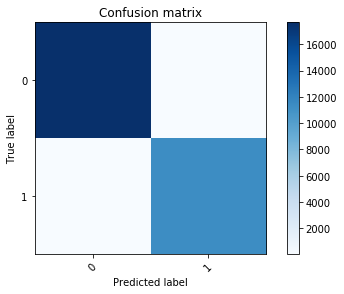

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17698
          1       1.00      1.00      1.00     11419

avg / total       1.00      1.00      1.00     29117



In [48]:
# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_neigh)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_neigh))

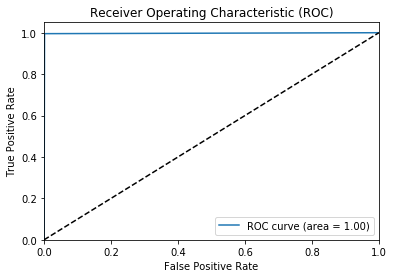

In [49]:
plot_roc(y_pred_neigh,y_test)

# MULTINOMIAL NAIVE BAYES

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
 scaler = MinMaxScaler()

In [52]:
input_array_min_max = scaler.fit_transform(input_array)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(input_array_min_max,output_array, test_size=0.2,random_state=42)

In [54]:
clf = MultinomialNB()

In [55]:
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
clf_predict = clf.predict(x_test)

In [57]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, clf_predict))

Evaluating with F1 score metric: 0.97


In [58]:
score = metrics.accuracy_score(y_test, clf_predict)
print("Accuracy score: {}".format(score))

Accuracy score: 0.97458529381461


In [59]:
score = metrics.precision_score(y_test,clf_predict, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.975428100565417


In [60]:
score = metrics.recall_score(y_test,clf_predict, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.97458529381461


[[17669    29]
 [  711 10708]]
Plotting confusion matrix


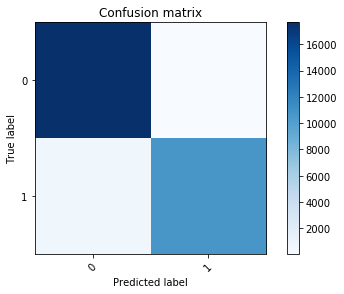

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     17698
          1       1.00      0.94      0.97     11419

avg / total       0.98      0.97      0.97     29117



In [61]:
# Compute confusion matrix
cm = confusion_matrix(y_test, clf_predict)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, clf_predict))

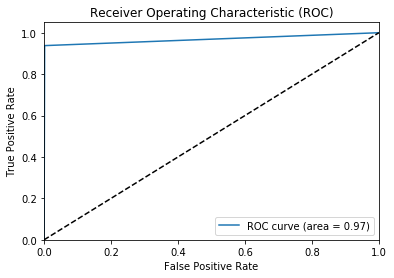

In [62]:
plot_roc(clf_predict,y_test)

# SUPPORT VECTOR MACHINE

In [63]:
SVM_classifier =  svm.SVC()

In [64]:
SVM_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
y_pred_SVM = SVM_classifier.predict(x_test)

In [66]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_SVM, average='micro'))

Evaluating with F1 score metric: 0.98


In [67]:
score = metrics.accuracy_score(y_test, y_pred_SVM)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9840642923378096


In [68]:
score = metrics.precision_score(y_test,y_pred_SVM, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.98411829951768


In [69]:
score = metrics.recall_score(y_test,y_pred_SVM, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9840642923378096


[[17571   127]
 [  337 11082]]
Plotting confusion matrix


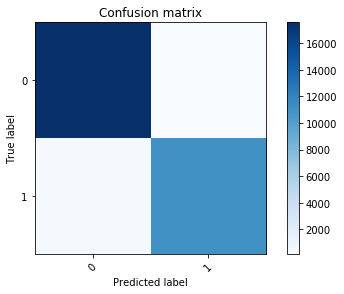

             precision    recall  f1-score   support

          0       0.98      0.99      0.99     17698
          1       0.99      0.97      0.98     11419

avg / total       0.98      0.98      0.98     29117



In [70]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_SVM))

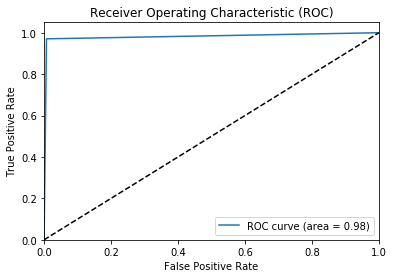

In [71]:
plot_roc(y_pred_SVM,y_test)

# Gaussian Naive Bayes 

In [72]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(x_train, y_train)
print(x_train.shape)
y_test1 = y_test.reshape((y_test.shape[0], 1))
GaussianNB_pred = GaussianNB_clf.predict(x_test)

(116467, 121)


In [73]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test1, GaussianNB_pred, average='micro'))

Evaluating with F1 score metric: 0.92


In [74]:
score = metrics.accuracy_score(y_test1, GaussianNB_pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9208022804547171


In [75]:
score = metrics.precision_score(y_test1,GaussianNB_pred, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9288129408848609


In [76]:
score = metrics.recall_score(y_test1,GaussianNB_pred, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9208022804547171


[[17639    59]
 [ 2247  9172]]
Plotting confusion matrix


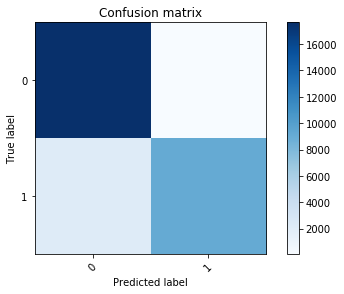

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     17698
          1       0.99      0.80      0.89     11419

avg / total       0.93      0.92      0.92     29117



In [77]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, GaussianNB_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test1, GaussianNB_pred))

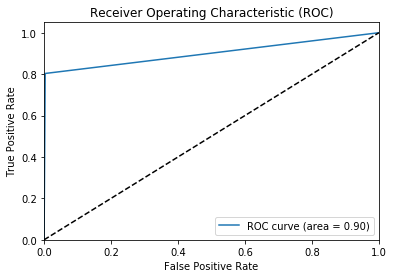

In [78]:
plot_roc(GaussianNB_pred,y_test1)

In [79]:
print(x_train.shape)
print(y_train.shape)

(116467, 121)
(116467,)


In [80]:
num_classes = 2
#Convert class vectors to one hot format
y_train = keras.utils.to_categorical(y_train,num_classes)
print(y_train[:1])
y_test = keras.utils.to_categorical(y_test,num_classes)

[[1. 0.]]


In [81]:
print(x_train.shape)
print(y_train.shape)

(116467, 121)
(116467, 2)


# Tensorflow Classification

In [82]:
for i in range(5):
    model_class = Sequential()
    model_class.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
    model_class.add(Dense(25, activation='relu')) # Hidden 2
    model_class.add(Dense(y_train.shape[1], activation='softmax')) # Output
    #model_class.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model_class.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
    checkpointer = ModelCheckpoint(filepath="best_weights_class.hdf5", verbose=0, save_best_only=True) # save best model
    model_class.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=10)

Train on 116467 samples, validate on 29117 samples
Epoch 1/10
 - 15s - loss: 0.0322 - acc: 0.9895 - val_loss: 0.0124 - val_acc: 0.9955
Epoch 2/10
 - 14s - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0064 - val_acc: 0.9981
Epoch 3/10
 - 14s - loss: 0.0076 - acc: 0.9978 - val_loss: 0.0073 - val_acc: 0.9980
Epoch 4/10
 - 15s - loss: 0.0068 - acc: 0.9981 - val_loss: 0.0061 - val_acc: 0.9982
Epoch 00004: early stopping
Train on 116467 samples, validate on 29117 samples
Epoch 1/10
 - 13s - loss: 0.0329 - acc: 0.9904 - val_loss: 0.0120 - val_acc: 0.9953
Epoch 2/10
 - 14s - loss: 0.0105 - acc: 0.9970 - val_loss: 0.0073 - val_acc: 0.9979
Epoch 3/10
 - 13s - loss: 0.0079 - acc: 0.9979 - val_loss: 0.0054 - val_acc: 0.9985
Epoch 4/10
 - 13s - loss: 0.0068 - acc: 0.9979 - val_loss: 0.0057 - val_acc: 0.9980
Epoch 5/10
 - 13s - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0066 - val_acc: 0.9981
Epoch 00005: early stopping
Train on 116467 samples, validate on 29117 samples
Epoch 1/10
 - 13s - loss: 0.0354 - 

In [83]:
model_class.load_weights('best_weights_class.hdf5') # load weights from best model

In [84]:
Tf_class_pred = model_class.predict(x_test)
pred1 = np.argmax(Tf_class_pred ,axis=1) # raw probabilities to chosen class (highest probability)
print(pred1)

[0 1 0 ... 1 1 0]


In [85]:
y_true= np.argmax(y_test,axis=1) 

In [86]:
score = metrics.accuracy_score(y_true, pred1)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9982827901226088


In [87]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_true,pred1 , average='micro'))

Evaluating with F1 score metric: 1.00


In [88]:
pre_score = metrics.precision_score(y_true, pred1, average= "weighted")
print("Precision score: {}".format(pre_score))

Precision score: 0.9982828250628513


In [89]:
score = metrics.recall_score(y_true,pred1, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9982827901226088


[[17679    19]
 [   31 11388]]
Plotting confusion matrix


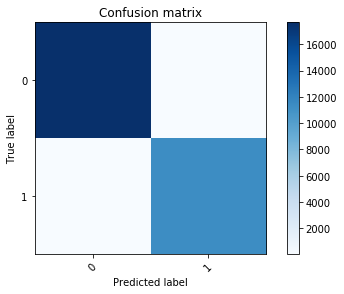

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17698
          1       1.00      1.00      1.00     11419

avg / total       1.00      1.00      1.00     29117



In [90]:
# Compute confusion matrix
cm = confusion_matrix(y_true,pred1)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_true, pred1))

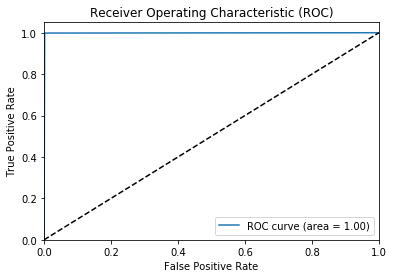

In [91]:
plot_roc(y_true,pred1)

# CNN 

In [92]:
x_train2 = x_train.reshape((116467,1,121,1))

print(x_train2[:2])
print(x_train2.shape)

[[[[0.00000000e+00]
   [2.97097256e-07]
   [1.93580874e-04]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [7.82778865e-03]
   [1.17416830e-02]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [1.00000000e+00]
   [0.00000000e+00]
   [3.30000000e-01]
   [5.72549020e-01]
   [1.00000000e+00]
   [1.00000000e+00]
   [0.00000000e+00]
   [1.00000000e-02]
   [2.00000000e-02]
   [1.00000000e-02]
   [1.00000000e-02]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [1.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]


In [93]:
# define a CNN
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(1, 10), strides=(1, 1),padding='valid',
                 activation='relu',
                 input_shape=(1,121,1)))

    # the above code is equivalent to 
    # model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnn.add(MaxPooling2D(pool_size=(1,2)))

cnn.add(Flatten())
cnn.add(Dense(30, activation="relu"))

cnn.summary()   
cnn.add(Dense(num_classes, activation="softmax"))
cnn.summary()
    
# define optimizer and objective, compile cnn
cnn.compile(loss="categorical_crossentropy", optimizer="adam" , metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 112, 64)        704       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 56, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 30)                107550    
Total params: 108,254
Trainable params: 108,254
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 112, 64)        704       
_________________________________________________________________
max_

In [94]:
cnn.fit(x_train2, y_train,validation_split=0.2,callbacks=[monitor,checkpointer],verbose=2,epochs=10)

Train on 93173 samples, validate on 23294 samples
Epoch 1/10
 - 147s - loss: 0.0383 - acc: 0.9883 - val_loss: 0.0208 - val_acc: 0.9933
Epoch 2/10
 - 131s - loss: 0.0144 - acc: 0.9958 - val_loss: 0.0107 - val_acc: 0.9963
Epoch 3/10
 - 132s - loss: 0.0102 - acc: 0.9972 - val_loss: 0.0082 - val_acc: 0.9974
Epoch 4/10
 - 127s - loss: 0.0084 - acc: 0.9976 - val_loss: 0.0096 - val_acc: 0.9964
Epoch 5/10
 - 127s - loss: 0.0073 - acc: 0.9978 - val_loss: 0.0115 - val_acc: 0.9966
Epoch 00005: early stopping


In [95]:
cnn.load_weights('best_weights_cnn.hdf5') # load weights from best model

In [96]:
x_test = x_test.reshape((-1,1,121,1))
print(x_test.shape)

(29117, 1, 121, 1)


In [97]:
pred = cnn.predict(x_test)
#pred = np.argmax(pred,axis=1)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (29117, 2)
[[9.9998331e-01 1.6737553e-05]
 [7.0018116e-03 9.9299812e-01]
 [9.9956924e-01 4.3071632e-04]
 ...
 [9.7315669e-06 9.9999022e-01]
 [3.9616780e-06 9.9999607e-01]
 [9.9981815e-01 1.8189824e-04]]


In [98]:
print(y_test.shape)

(29117, 2)


In [99]:
pred=pred.reshape((-1,2))
print(pred.shape)

(29117, 2)


In [100]:
score = metrics.accuracy_score(y_test, pred.round())
print('Accuracy: {}'.format(score))

Accuracy: 0.997836315554487


In [101]:
f1 = metrics.f1_score(y_test, pred.round(), average='weighted')
print('Averaged F1: {}'.format(f1))

Averaged F1: 0.997836332357851


In [102]:
print(metrics.classification_report(y_test, pred.round()))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17698
          1       1.00      1.00      1.00     11419

avg / total       1.00      1.00      1.00     29117



In [103]:
score = metrics.precision_score(y_test,pred.round(), average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9978363516293659


In [104]:
score = metrics.recall_score(y_test,pred.round(), average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.997836315554487


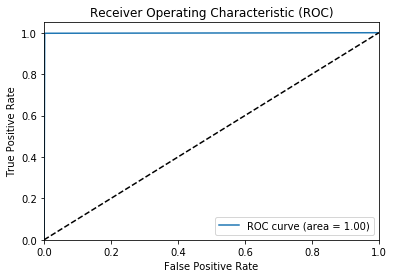

In [105]:
plot_roc(pred.round().argmax(axis=1),y_test.argmax(axis=1))

[[17666    32]
 [   31 11388]]
Plotting confusion matrix


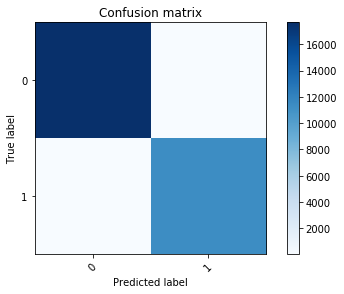

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17698
          1       1.00      1.00      1.00     11419

avg / total       1.00      1.00      1.00     29117



In [106]:
# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), pred.round().argmax(axis=1))
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test.argmax(axis=1), pred.round().argmax(axis=1)))